In [79]:
# Import libraries
import string
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense

In [78]:
# Initial configurations and properties
window_size = 2
embedding_dim = 2
stop_words = ['the', 'a', 'and', 'is', 'be', 'will']

In [61]:

# Function to remove punctuation
def remove_punctutation(text):
    return text.translate(str.maketrans('', '', string.punctuation))

# Function to remove stop words
def remove_stopwords(text):
    return ' '.join([word for word in text.split() if word not in stop_words])

In [62]:
df = pd.read_csv('data/royal-family.csv')

# Apply preprocesses
df['text'] = df['text'].apply(remove_punctutation)
df['text'] = df['text'].apply(remove_stopwords)

In [63]:
# Create vocabulary
words = set(' '.join(df['text']).split())
vocab = {word: i for i, word in enumerate(words)}


In [64]:
# Create windowed contexts
contexts = []

for text in df['text']:
    
    for i in range(0, len(text.split()) - window_size):
        context = text.split()[i:i + window_size]
        contexts.append(context)

In [76]:
# One hot encoding
def one_hot_encoding(token):
    
    token_vector = np.zeros(len(vocab))
    token_vector[vocab[token]] = 1

    return token_vector

X, Y = [], []

for context in contexts:

    # Encode
    X_one_hot = one_hot_encoding(context[0])
    Y_one_hot = one_hot_encoding(context[1])

    # Append to corresponding lists
    X.append(X_one_hot)
    Y.append(Y_one_hot)

# Conver to numpy arrays
X = np.array(X)
Y = np.array(Y)

In [87]:
# Build the model
model = Sequential()
model.add(Dense(units = embedding_dim, input_dim = X.shape[1], activation = 'linear'))
model.add(Dense(units = Y.shape[1], activation = 'softmax'))

# Compile the model
model.compile(
    loss = 'categorical_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

# Train the model
model.fit(
    X,
    Y,
    epochs = 1000,
    batch_size = 256,
    verbose = 0
)

In [88]:
# Get word embedding vectors
weights = model.get_weights()[0]

# Create Embedding dictionary
embedding_dict = {}
for word in words: 
    embedding_dict.update({word: weights[vocab.get(word)]})

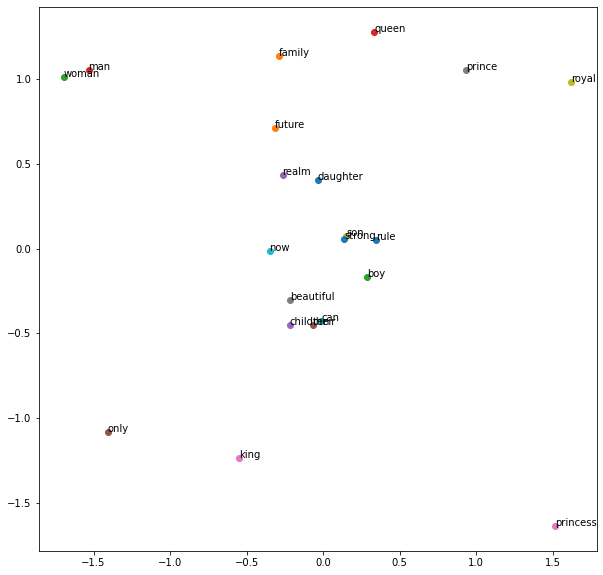

In [90]:
# Plot the model pari-wise
plt.figure(figsize = (10, 10))

for word in list(vocab.keys()):
  coord = embedding_dict.get(word)

  plt.scatter(coord[0], coord[1])
  plt.annotate(word, (coord[0], coord[1]))